# Calculate Value at Risk (VaR) Using the Monte Carlo Method

The project aims to develop a Python program for calculating the Value at Risk (VaR) using the Monte Carlo Method. Value at Risk is a widely used risk measure in finance, providing an estimate of the maximum potential loss on an investment over a specified time horizon, at a certain level of confidence.

The Monte Carlo Method is a powerful computational technique used to simulate a wide range of scenarios by generating random samples from probability distributions. In this project, we will leverage Monte Carlo simulations to estimate the potential losses in a portfolio or investment under different market conditions.

The project will involve several key steps:
1. Data Collection: Obtain historical data relevant to the portfolio or investment being analyzed. This may include asset prices, returns, and other relevant financial data.
2. Model Specification: Define the financial model and assumptions underlying the Monte Carlo simulation. This involves selecting appropriate probability distributions for asset returns and specifying correlations between assets.
3. Monte Carlo Simulation: Implement the Monte Carlo Method in Python to simulate thousands or millions of possible future scenarios for the portfolio. This involves generating random samples from the specified probability distributions and calculating portfolio values for each scenario.
4. VaR Calculation: Analyze the simulated portfolio values to estimate the Value at Risk at a specified confidence level (e.g., 95%, 99%). VaR represents the potential loss that could be exceeded with a given probability over the specified time horizon.
5. Results Visualization: Visualize the results of the VaR calculation using appropriate charts and graphs. This helps stakeholders better understand the risk profile of the portfolio and make informed decisions.

By completing this project, participants will gain a deeper understanding of Value at Risk (VaR) and Monte Carlo simulations in finance, as well as proficiency in implementing these concepts using Python programming. This project can be valuable for students, finance professionals, and anyone interested in risk management and quantitative finance.

Let's begin by importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In this section, we set the time range for our historical data to 10 years and create a list of stock tickers for our portfolio.

In [17]:
# Set time from to a certain number of years
years = 10

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

# Create a list of tickers
tickers = ['LPPF.JK','EXCL.JK','JPFA.JK','MYOR.JK','DMAS.JK']

Next, download the daily adjusted close prices for each stock ticker using the yfinance library and store the data in a DataFrame.

In [18]:
# Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                LPPF.JK      EXCL.JK      JPFA.JK      MYOR.JK  DMAS.JK
Date                                                                   
2014-02-25  9138.896484  3998.351318  1262.898560  1093.562134      NaN
2014-02-26  9189.387695  3957.178223  1224.512939  1082.841187      NaN
2014-02-27  9357.690430  3998.351318  1224.512939  1082.841187      NaN
2014-02-28  9425.011719  4254.539062  1224.512939  1075.693481      NaN
2014-03-03  8819.120117  4103.570801  1212.996948  1075.693481      NaN
...                 ...          ...          ...          ...      ...
2024-02-19  1955.000000  2200.000000  1080.000000  2260.000000    162.0
2024-02

# Calculating Daily Log Return

In [7]:
# Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns  = log_returns.dropna()

print(log_returns)

             LPPF.JK   EXCL.JK   JPFA.JK   MYOR.JK   DMAS.JK
Date                                                        
2015-06-01 -0.007189  0.036617 -0.022306  0.038466  0.004556
2015-06-03  0.002882 -0.016998 -0.007548 -0.019048  0.013544
2015-06-04 -0.001440  0.011364  0.000000 -0.026304 -0.013544
2015-06-05  0.008608 -0.006803  0.000000  0.026304  0.000000
2015-06-08 -0.052688 -0.099186 -0.054488 -0.001925 -0.018349
...              ...       ...       ...       ...       ...
2024-02-19 -0.007643 -0.031322  0.000000 -0.043297  0.006192
2024-02-20 -0.033813  0.004535  0.009217  0.013187 -0.006192
2024-02-21 -0.007968  0.009009 -0.004598  0.017316  0.000000
2024-02-22  0.015873  0.035246  0.013730  0.017022  0.000000
2024-02-23 -0.005263 -0.017468  0.000000  0.008403  0.006192

[2159 rows x 5 columns]


Calculate the daily log returns for each stock in the portfolio and drop any missing values.

In [19]:
# Create a function that will be used to calculate portfolio expected return
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Create a function that will be used to calculate portfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

Defining Functions to Calculate Portfolio Expected Return and Standard Deviation

In [20]:
### Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

          LPPF.JK   EXCL.JK   JPFA.JK   MYOR.JK   DMAS.JK
LPPF.JK  0.001160  0.000160  0.000124  0.000097  0.000122
EXCL.JK  0.000160  0.000788  0.000173  0.000088  0.000131
JPFA.JK  0.000124  0.000173  0.000830  0.000089  0.000145
MYOR.JK  0.000097  0.000088  0.000089  0.000418  0.000056
DMAS.JK  0.000122  0.000131  0.000145  0.000056  0.000525


In [21]:
### Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

          LPPF.JK   EXCL.JK   JPFA.JK   MYOR.JK   DMAS.JK
LPPF.JK  0.001160  0.000160  0.000124  0.000097  0.000122
EXCL.JK  0.000160  0.000788  0.000173  0.000088  0.000131
JPFA.JK  0.000124  0.000173  0.000830  0.000089  0.000145
MYOR.JK  0.000097  0.000088  0.000089  0.000418  0.000056
DMAS.JK  0.000122  0.000131  0.000145  0.000056  0.000525


# Defining Functions to Calculate Portfolio Expected Return and Standard Deviation

In [22]:
# Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

Define two functions, **_expected_return()_** and **_standard_deviation()_**, which will be used to calculate the expected return and standard deviation of our portfolio, respectively.

# Creating a Covariance Matrix

In [27]:
# Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

          LPPF.JK   EXCL.JK   JPFA.JK   MYOR.JK   DMAS.JK
LPPF.JK  0.001160  0.000160  0.000124  0.000097  0.000122
EXCL.JK  0.000160  0.000788  0.000173  0.000088  0.000131
JPFA.JK  0.000124  0.000173  0.000830  0.000089  0.000145
MYOR.JK  0.000097  0.000088  0.000089  0.000418  0.000056
DMAS.JK  0.000122  0.000131  0.000145  0.000056  0.000525


Create a covariance matrix for all the securities in our portfolio using the daily log returns.

In [28]:
# Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

Create an equally weighted portfolio and calculate the portfolio’s expected return and standard deviation using the functions defined earlier.

# Defining Functions for Monte Carlo Simulation

In [29]:
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 30

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

random_z_score() and scenario_gain_loss(). The first function generates a random Z-score based on a normal distribution, and the second function calculates the gain or loss for a given scenario.

In [33]:
### Run 10000000 simulations
simulations = 10000000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

# Calculating Value at Risk

In [34]:
# Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.999
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

264544.2587210891


Let's specify a confidence interval of 99,9% and calculate Value at Risk (VaR) using the results of our simulations.

# Plotting the Results

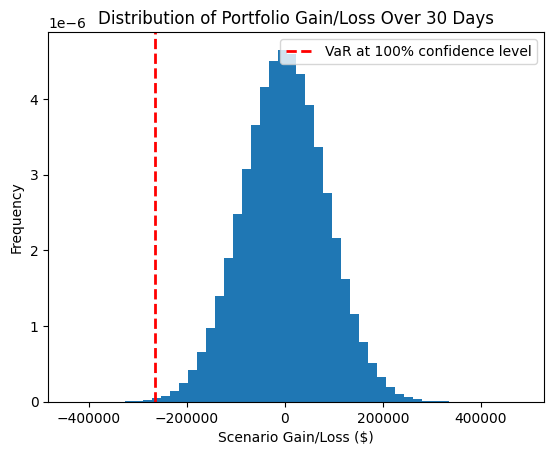

In [35]:
# Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

Finally, we create a histogram to visualize the distribution of portfolio gain/loss over the specified number of days. We also add a vertical dashed line to indicate the VaR at our chosen confidence level.